In [1]:
!pip uninstall tensorflow-estimator -y # Uninstall tensorflow-estimator if already present
!pip install tensorflow==2.11.* #Install tensorflow 2.11
!pip install tensorflow-estimator==2.11.* # Install tensorflow-estimator matching the TensorFlow version
import tensorflow as tf
import tensorflow_estimator

Found existing installation: tensorflow-estimator 2.11.0
Uninstalling tensorflow-estimator-2.11.0:
  Successfully uninstalled tensorflow-estimator-2.11.0
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.11.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
import plotly.express as px
import seaborn as sns
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
dftrain=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [4]:
numeric_columns = dftrain.select_dtypes(include=['number']).columns
df_numeric = dftrain[numeric_columns]

px.imshow(df_numeric.corr(), text_auto=True)


In [5]:
y_train=dftrain['survived']
y_eval=dfeval['survived']
dftrain=dftrain.drop(columns=['survived'])
dfeval=dfeval.drop(columns=['survived'])

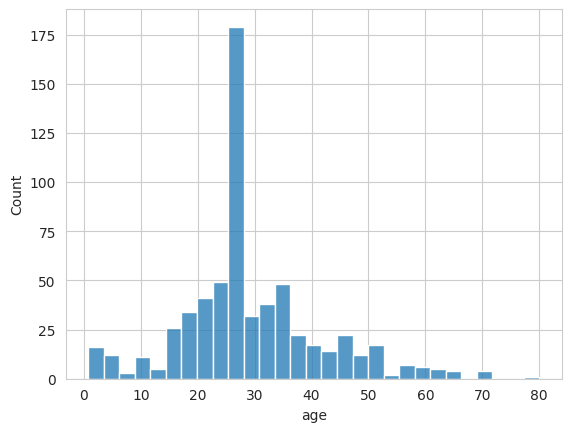

In [6]:
sns.set_style('whitegrid')
sns.histplot(dftrain['age'])
plt.show()

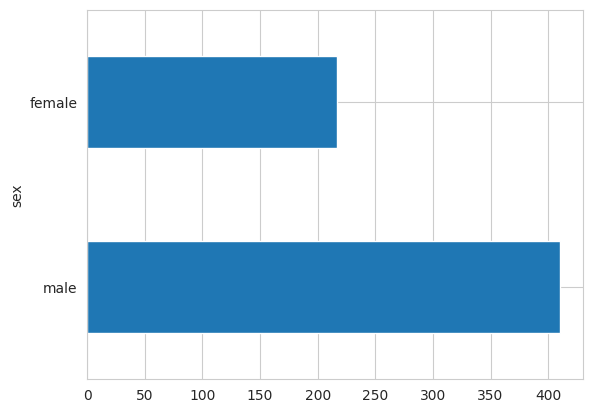

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')
plt.show()

<Axes: ylabel='class'>

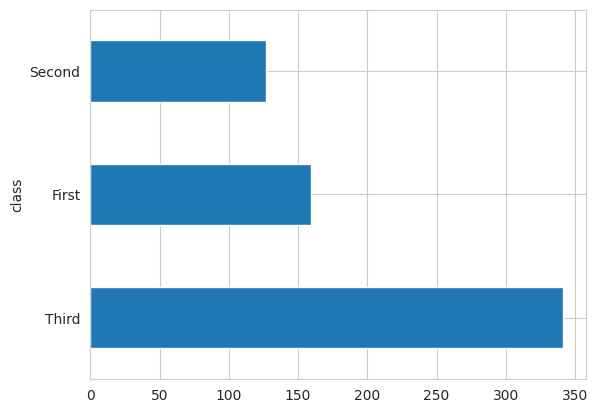

In [7]:
dftrain['class'].value_counts().plot(kind='barh')

In [8]:
a=pd.DataFrame()
a['sex']=dftrain['sex']
a['survived']=y_train
a.head()

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


<Axes: ylabel='sex'>

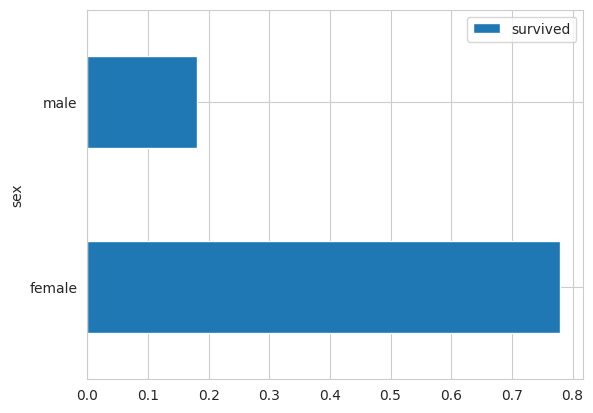

In [9]:
a.groupby(['sex']).mean().plot(kind='barh')

In [10]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS :
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))
for feature_name in NUMERIC_COLUMNS :
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [11]:
def make_input_fn(data_df , label_df , num_epochs =10 , shuffle= True , batch_size =32):
    def input_function ():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle :
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fn= make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [12]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

In [13]:
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)
print(result['accuracy'])

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


0.7689394


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

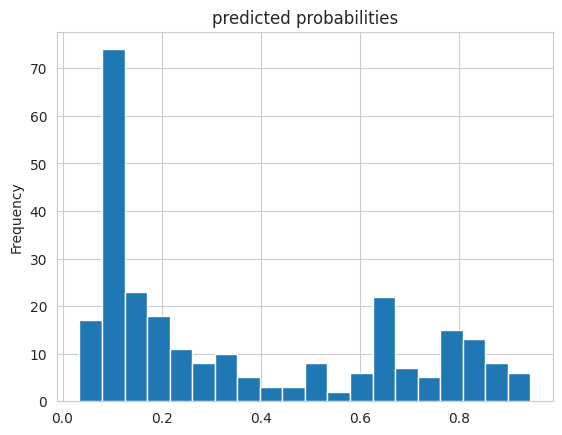

In [14]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [15]:
result = list(linear_est.predict(eval_input_fn))
print(result[0]['probabilities'])

[0.9219983  0.07800166]


In [18]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result[0]['probabilities'])

sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
[0.9219983  0.07800166]


In [20]:
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[6])
print(y_eval.loc[6])
print(result[0]['probabilities'])

sex                        female
age                           8.0
n_siblings_spouses              3
parch                           1
fare                       21.075
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 6, dtype: object
0
[0.9219983  0.07800166]
